<a href="https://colab.research.google.com/github/atharva-729/Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: atharva729
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata


100%|██████████| 8.89M/8.89M [00:00<00:00, 131MB/s]

In [ ]:
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [ ]:
%cd /content/tmdb-movie-metadata

/content/tmdb-movie-metadata


In [ ]:
movies = pd.read_csv("tmdb_5000_movies.csv")

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits = pd.read_csv("tmdb_5000_credits.csv")

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits.shape

(4803, 4)

In [ ]:
movies.shape

(4803, 20)

In [ ]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
movies.id

0        19995
1          285
2       206647
3        49026
4        49529
         ...  
4798      9367
4799     72766
4800    231617
4801    126186
4802     25975
Name: id, Length: 4803, dtype: int64

In [ ]:
movies.drop(["homepage"], axis=1, inplace=True)

In [ ]:
movies.loc[movies.release_date.isna()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [ ]:
credits.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [ ]:
credits.loc[4553]

movie_id                        380097
title       America Is Still the Place
cast                                []
crew                                []
Name: 4553, dtype: object

In [ ]:
movies.drop(4553, inplace=True)
credits.drop(4553, inplace=True)
credits.reset_index(drop=True, inplace=True)
movies.reset_index(drop=True, inplace=True)

In [ ]:
movies.isna().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 843
title                     0
vote_average              0
vote_count                0
dtype: int64

In [ ]:
movies.loc[movies.overview.isna()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8


In [ ]:
movies.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

**genres and ither columns have json listed values**

In [ ]:
j = json.loads(movies.genres[0])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [ ]:
" ".join("".join(gen["name"].split()) for gen in j)

'Action Adventure Fantasy ScienceFiction'

this above line explained:
we cycle throught the list j and we split for the reason of getting genres like "Science Fiction" which have a space in between into a single word <br>
afterwards we join all the genres into a string, where they are separated by space

**We mostly need the genres and keywords columns** <br>
so we will be mostly using those now and put them in the TfIdfVectorizer

In [ ]:
def genres_and_keywords_to_string(row):
  genres = json.loads(row["genres"])
  genres = " ".join("".join(gen["name"].split()) for gen in genres)

  keywords = json.loads(row["keywords"])
  keywords = " ".join("".join(key["name"].split()) for key in keywords)
  return "%s %s" % (genres, keywords)

In [ ]:
# make new column for the string we manufacture
movies["string"] = movies.apply(genres_and_keywords_to_string, axis=1)

In [ ]:
tfidf = TfidfVectorizer(max_features=2000)

In [ ]:
X = tfidf.fit_transform(movies["string"])

In [ ]:
X

<4802x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

experimetn with max_features and see which works best

In [ ]:
movieindex = pd.Series(movies.index, index=movies.title)

In [ ]:
movieindex

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4797
Newlyweds                                   4798
Signed, Sealed, Delivered                   4799
Shanghai Calling                            4800
My Date with Drew                           4801
Length: 4802, dtype: int64

In [ ]:
import re
# use this to search for some harry potter movie
# also check the cut off date on this dataset

In [ ]:
idx = movieindex["The Dark Knight"]
idx

65

In [ ]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [ ]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
scores = cosine_similarity(query, X)
scores

array([[0.0080192 , 0.00841281, 0.0407199 , ..., 0.0074005 , 0.        ,
        0.        ]])

this is a 2d array with shape 1xN and now we will make it 1d using flatten

In [ ]:
scores = scores.flatten()

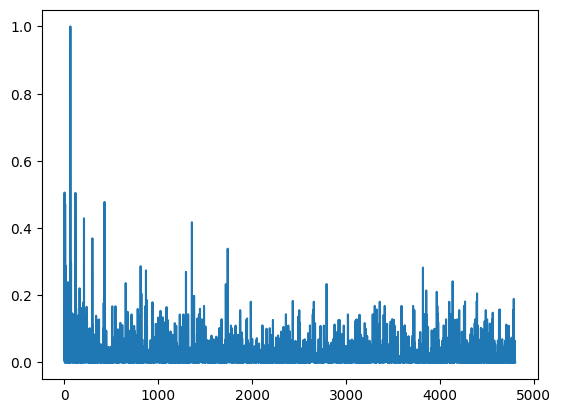

In [ ]:
plt.plot(scores)

we want the scores to go in descending order and we do not care about the actual score, we just need the ranking of the movies, so we will use (-scores)<br><br>
also, we do not need the sorted values. we need the index (argument) of the sorted values, so we sill use argsort

In [ ]:
(-scores).argsort()

array([  65,    3,  119, ..., 3721, 3682, 4801])

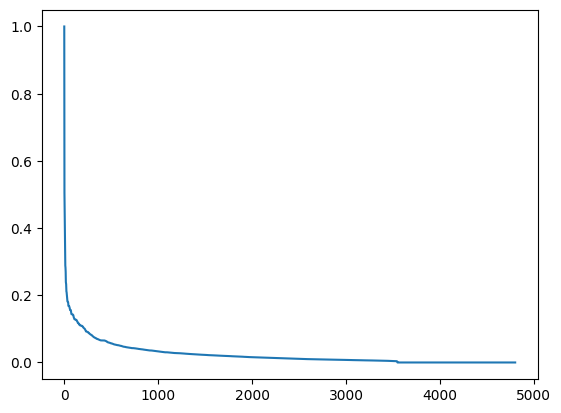

In [ ]:
plt.plot(scores[(-scores).argsort()])

In [ ]:
recommended_idx = (-scores).argsort()[1:11]

In [ ]:
movies["title"].iloc[recommended_idx]

3                    The Dark Knight Rises
119                          Batman Begins
428                         Batman Returns
9       Batman v Superman: Dawn of Justice
210                         Batman & Robin
1359                                Batman
299                         Batman Forever
1740                            Kick-Ass 2
72                           Suicide Squad
10                        Superman Returns
Name: title, dtype: object

In [ ]:
movies["title"].loc[recommended_idx]

3                    The Dark Knight Rises
119                          Batman Begins
428                         Batman Returns
9       Batman v Superman: Dawn of Justice
210                         Batman & Robin
1359                                Batman
299                         Batman Forever
1740                            Kick-Ass 2
72                           Suicide Squad
10                        Superman Returns
Name: title, dtype: object

In [ ]:
# make a function for all
def recommend(title):
    ind = movieindex[title]
    if type(ind) == pd.Series:
        ind = ind.iloc[0]

    query = X[ind]
    scores = cosine_similarity(query, X)

    scores = scores.flatten()

    recommended_ind = (-scores).argsort()[1:11]

    return movies.title.loc[recommended_ind]

In [ ]:
print(recommend("Mortal Kombat"))

1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
2237                        Alone in the Dark
2261                                 Rapa Nui
107                                  Warcraft
947                               Silent Hill
1238                 The Island of Dr. Moreau
417                                 Creepshow
Name: title, dtype: object


In [ ]:
for t in movies.title:
    if t.startswith("Harry Potter"):
        print(t)

Harry Potter and the Half-Blood Prince
Harry Potter and the Order of the Phoenix
Harry Potter and the Goblet of Fire
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Philosopher's Stone
Harry Potter and the Chamber of Secrets


In [ ]:
for t in movies.title:
    if t.startswith("Fast"):
        print(t)

Fast Five
Faster
Fast Times at Ridgemont High


In [ ]:
print(recommend("Harry Potter and the Chamber of Secrets"))

113     Harry Potter and the Order of the Phoenix
191      Harry Potter and the Prisoner of Azkaban
114           Harry Potter and the Goblet of Fire
197      Harry Potter and the Philosopher's Stone
8          Harry Potter and the Half-Blood Prince
2366                                 Dragonslayer
2568                                    The Craft
103                     The Sorcerer's Apprentice
1481               Thunder and the House of Magic
1764                                 Return to Oz
Name: title, dtype: object
